In [19]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline

# load downloaded data
dat = np.load('data/mesoscope_activity.npy',allow_pickle=True)
dat = dat.item()
sp  = dat['spks']
sp  = zscore(sp, axis=1)
xyloc = dat['xyloc']

In [37]:
# rastermap algorithm
import sys
sys.path.append(r'C:\Users\lgantar.WISMAIN\Documents\GitHub\rastermap\rastermap')
import mapping, imp
imp.reload(mapping)

model = mapping.Rastermap(n_components=1).fit(sp)

nmin 200
0.05388593673706055
1.0488779544830322
1.090766429901123
1.1037311553955078
(38, 40)
(70,)
1.0
time; iteration;  explained PC variance
0.41s     0        0.0318      2
0.52s    10        0.1411      4
0.62s    20        0.1800      8
0.73s    30        0.2299      18
0.82s    40        0.2533      28
0.93s    50        0.2734      38
1.06s    60        0.2752      38
1.16s   final      0.2757
1.16s upsampled    0.2757


In [38]:
### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

# (optional) smooth in time
#Sm = gaussian_filter1d(Sm, 1, axis=1)


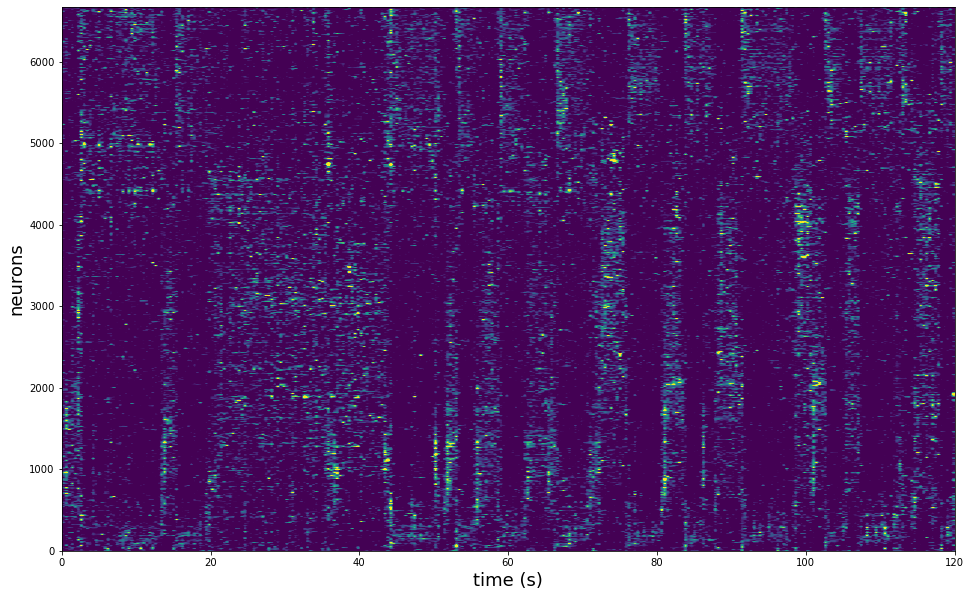

In [35]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,1500:1800]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

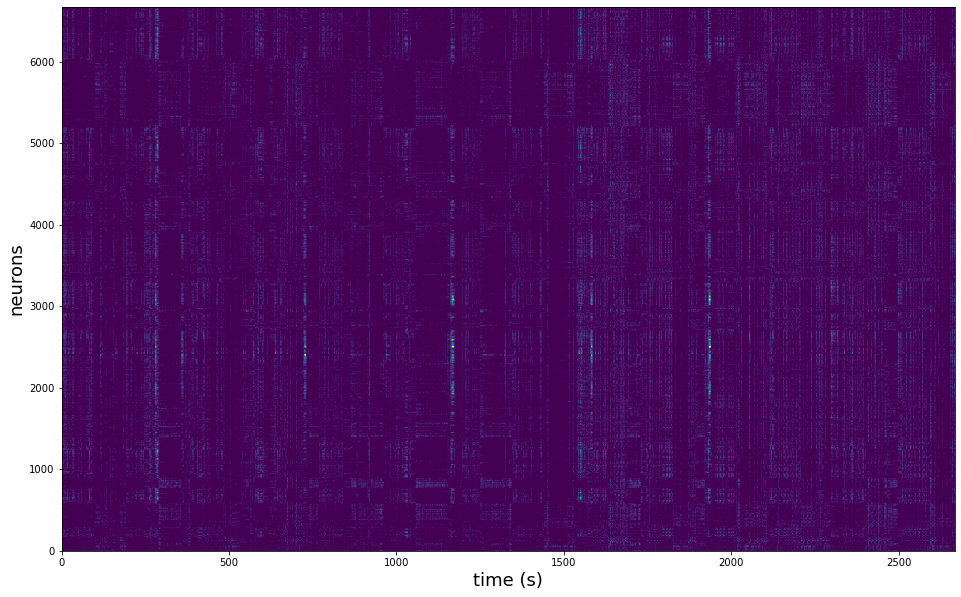

In [40]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[model.isort]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

In [ ]:
### view positions of cells colored by rastermap

# colormap
cmap = cm.get_cmap('hsv')
cmap = cmap(np.linspace(0.,1,sp.shape[0]))

plt.figure(figsize=(8,8))
# assign color based on embedding
plt.scatter(xyloc[:,0], xyloc[:,1], s=4, color=cmap[isort,:])
plt.xlabel('x location (um)')
plt.ylabel('y location (um)');
plt.show()

In [28]:
sp.shape

(6670, 6668)

In [29]:
Sm.shape

(6670, 6668)

In [30]:
model.isort.shape

(6670,)

In [39]:
model.embedding.shape

(6670, 1)